In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data

**This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)**

1. Id number: 1 to 214 (removed from CSV file)
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
       -- 1 buildingwindowsfloatprocessed 
       -- 2 buildingwindowsnonfloatprocessed 
       -- 3 vehiclewindowsfloatprocessed
       -- 4 vehiclewindowsnonfloatprocessed (none in this database)
       -- 5 containers
       -- 6 tableware
       -- 7 headlamps

 
 # Acknowledgements
 
* Source:
    https://archive.ics.uci.edu/ml/datasets/Glass+Identification
* Creator:
     B. German
     Central Research Establishment
     Home Office Forensic Science Service
     Aldermaston, Reading, Berkshire RG7 4PN
 
* Donor:
     Vina Spiehler, Ph.D., DABFT
     Diagnostic Products Corporation
     (213) 776-0180 (ext 3014)

In [ ]:
df = pd.read_csv('../input/glass/glass.csv')
df.head()

In [ ]:
print('Number of Null Values: ',df.isnull().sum().sum())

# Data Analysis

In [ ]:
df['Type'] = df['Type'].astype('category')
print(df.dtypes)
df.describe()

From the above Description...
ON AN AVERAGE ALL THESE GLASS TYPES CONTAIN HIGH LEVELS OF SILICON(SI), MODERATE AMOUNTS OF CALCIUM(CaO),SODIUM(Na2O)...etc.
Most of the above elements are alkali or alkali earth metals. 

Alkali metal oxide reduces the working temperature and plays an important role in setting the thermal expansion. If the alkali metal oxides content is above a certain limit, glasses exhibit a high coefficient of thermal expansion (Marques, 2008). 
A higher level of alkali oxide also causes an adverse effect on hydrolytic stability.

Li+ forms strong bonds with the glass network and increases the acid resistance of the glass (Marques, 2008).

Peuchert et al. (2004) also discussed the role of alkali metal oxides on crystallization and suggested using at least two alkali metal oxides, even in small amounts, in order to have a positive effect on resisting unwanted crystallization.

[Refer](http://https://www.sciencedirect.com/topics/materials-science/alkali-metal-oxide#:~:text=Properties%20of%20Glass%20Materials&text=Alkali%20metal%20oxide%20reduces%20the,expansion%20(Marques%2C%202008).)

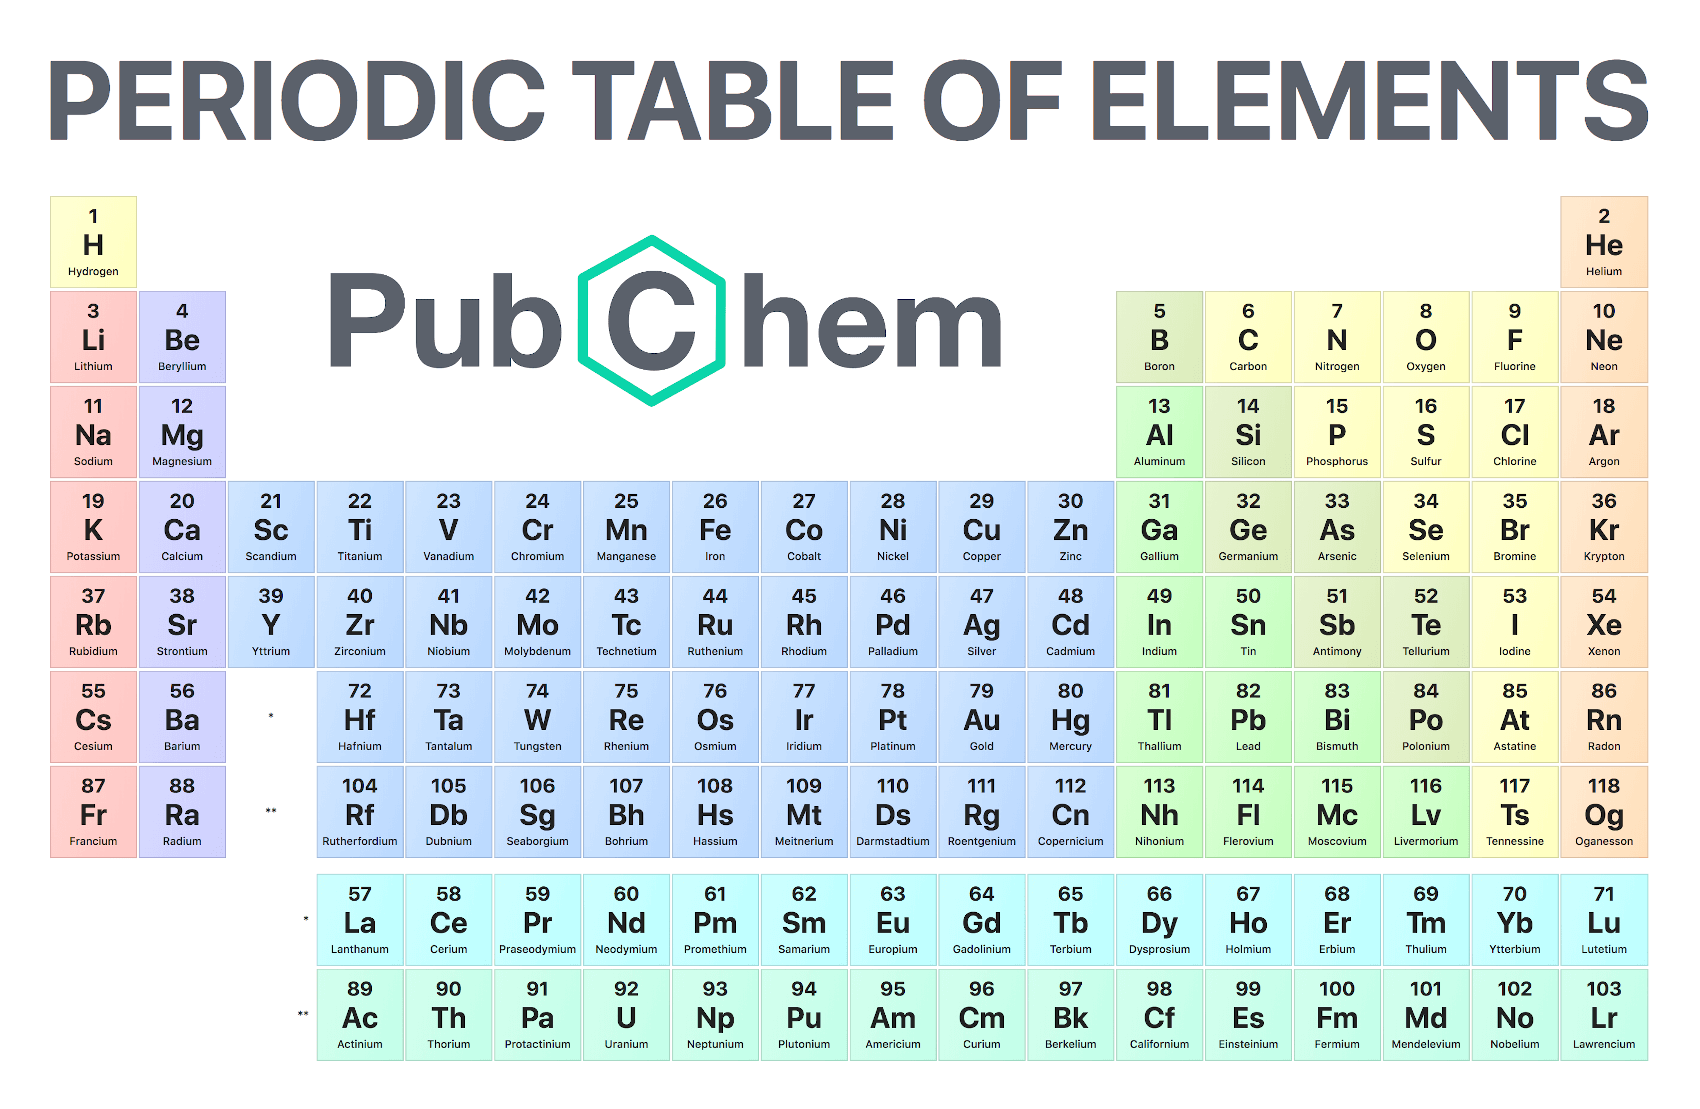

Not a very evenly distributed(unfortunately)

This will look bad on the model's performance. :(

In [ ]:
df['Type'].value_counts()

In [ ]:
features = ['RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [ ]:
plt.figure(figsize = (20,16))
n=0
for i in features:
    n+=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
    plot = sns.barplot(x = "Type", y = i,ci = None, data = df)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2.,p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    plt.title = ('Plot of {i}')
    plt.xlabel = ('Type')
    plt.ylabel = ('{i}')
plt.show()

## Observation

* All Types have the same Refractive Index and Silicon(Si)
Silicon is a very important element in making of glass and hence it is used for the purpose.
* Type 5 contains a significantly high amount of Pottasium(K) compared to other types and a higher level of Calcium(Ca)
Alkali (Na, K) – lime (Ca,Mg) glass is by far the most common glass type today, and has been the most common ever since glass-blowing began in the ﬁrst century BC in the Near East.
Although glass can be produced from just two compounds, silica (SiO2) as a glass former andeither soda (Na2CO3) or potash (K2CO3) as a network modiﬁer or ﬂux, **lime (CaO) is essential as a third compound to stabilize the glass against rapid chemical attack by ﬂuids.**
Type 5 is container glass and that is the reason why it need extra protection from rapid chemical attack in order to serve its purpose, which explains why it has higher amount of Calcium. Type 5 also contains the lowest amount of sodium, which explains why it has a higher amount of Pottasium(K)
* Type 1 & 3 have a almost equal amount of Magnesium(Mg) than others
Mg has properties that help stabilise the Na reaction, which explains why type 1 and 3 also have similar amounts of Sodium.
* Type 7 has a significantly high amount of Barium(Ba) than all others
**Glass-to-metal seals are a very important element of the construction of vacuum tubes, electric discharge tubes, incandescent light bulbs**, glass encapsulated semiconductor diodes, reed switches, pressure tight glass windows in metal cases, and metal or ceramic packages of electronic components. Alkali Barium glass is bext suited for this purpose.
Type 7 is used in headlamps and hence in contains more Alkali Barium

In order to visually examine correlation between features, use pairplot

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

In [ ]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

# Observation

The Refractive Index is correlated to the Ca Oxide Content quite heavily...
the increase in CaO content or R ratio, heat‐treated glasses exhibit direct band gap within 5.92‐6.01 eV range. 
The Urbach energy lies within the 0.62‐0.86 eV range for all the heat‐treated glass samples.

And it has been proved that CaO content has influence on the optical parameters of the glass.

# Encoding

In [ ]:
temp = pd.get_dummies(df['Type'],prefix = 'Type')
df = pd.concat([df,temp],axis = 1)
df.drop(['Type'],axis = 1,inplace = True)
df.head()

In [ ]:
target = ['Type_1', 'Type_2', 'Type_3', 'Type_5', 'Type_6', 'Type_7']

# Principal Component Analysis

In [ ]:
# Scaling the features since, PCA is sensitive to scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,target].values
# Standardizing the features
X = scaler.fit_transform(X)

# Pricipal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(X)
pc_df = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4'])
pc_df = pd.concat([pc_df, df[target]], axis = 1)

In [ ]:
pc_df.head()

The Dimensions of the dataset has reduced from 9 to 4, this will help our model's performance in many ways

# Defining the Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,log_loss,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Input
target_names = target

In [ ]:
def eval(y_test, y_pred):
    print('LOG LOSS: ',log_loss(y_test, y_pred))
    print('ACCURACY SCORE: ',accuracy_score(y_test, y_pred))
    print('R2 SCORE: ',r2_score(y_test, y_pred),'\n')

In [ ]:
def neigh(X_train,y_train,X_test,y_test):
    pipe = Pipeline([('scaler', StandardScaler()), ('neigh', KNeighborsClassifier())])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print('KNN_CLASSIFIER: ')
    print(classification_report(y_test, y_pred, target_names=target_names,zero_division = 1))
    print('PIPE SCORE: ', pipe.score(X_test, y_test))
    eval(y_test,y_pred)
    print(pipe.get_params())

In [ ]:
def tree(X_train,y_train,X_test,y_test):
    pipe = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print('DECISION TREE: ')
    print(classification_report(y_test, y_pred, target_names=target_names,zero_division = 1))
    print('PIPE SCORE: ', pipe.score(X_test, y_test))
    eval(y_test,y_pred)
    print(pipe.get_params())

In [ ]:
def forest(X_train,y_train,X_test,y_test):
    #Parameter Grid
    pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestClassifier())])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    #Evaluation Phase
    print('RANDOM FOREST: ')
    print(classification_report(y_test, y_pred, target_names=target_names,zero_division = 1))
    eval(y_test,y_pred)
    print(pipe.get_params())

In [ ]:
def ann(X_train,y_train,X_test,y_test):
    #Build
    model = Sequential()
    model.add(Input(4,))
    model.add(Dense(units = 500,activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units = 400,activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units = 300,activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units = 200,activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(units = 6,activation = 'softmax'))
    model.summary()
    #Train
    model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['categorical_accuracy'])
    model.fit(X_train,y_train,epochs = 30)
    Test_Loss,Test_Accuracy = model.evaluate(X_test,y_test)
    print('Test Loss : ',Test_Loss,'\nTest Accuracy',Test_Accuracy)

# Spliting Data

In [ ]:
X = pc_df.iloc[:,:4]
y = pc_df.iloc[:,4:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 7)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
forest(X_train,y_train,X_test,y_test)

In [ ]:
neigh(X_train,y_train,X_test,y_test)

In [ ]:
tree(X_train,y_train,X_test,y_test)

In [ ]:
ann(X_train,y_train,X_test,y_test)